# Requirements

In [46]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## The Water Potability Dataset

## Downloading the Water Potability Dataset

In [ ]:
!gdown 1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1rkN2eHQmUh6ZtIUB0pz_VEFMIhk1c7lW
To: /content/water-potability.csv
100% 525k/525k [00:00<00:00, 91.5MB/s]


## Exploring the Water Potability Dataset
The Water Potability dataset contains water quality metrics for 3276 different water bodies. The dataset includes ten attributes, each providing valuable information about water characteristics. These attributes encompass pH value, hardness, total dissolved solids (TDS), chloramines, sulfate concentration, conductivity, organic carbon, trihalomethanes, turbidity, and the target variable, potability. pH value is crucial for assessing the acid–base balance, while hardness indicates the presence of calcium and magnesium salts. TDS measures the mineral content, chloramines are disinfectants, sulfate is a natural substance found in minerals, conductivity indicates water's ability to conduct electric current, organic carbon measures carbon in organic compounds, and trihalomethanes are chemicals found in chlorine-treated water. Turbidity assesses the quantity of solid matter in suspended state. The target variable, 'Potability,' is binary (1 for potable and 0 for not potable), indicating whether water is safe for human consumption.

Load the dataset into a `pandas` data frame.

In [116]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('./data/water-potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [48]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [49]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Explore the dataset using visualizations of your choice.

In [50]:
# Write your code here. Add as many boxes as you need.
import matplotlib.pyplot as plt

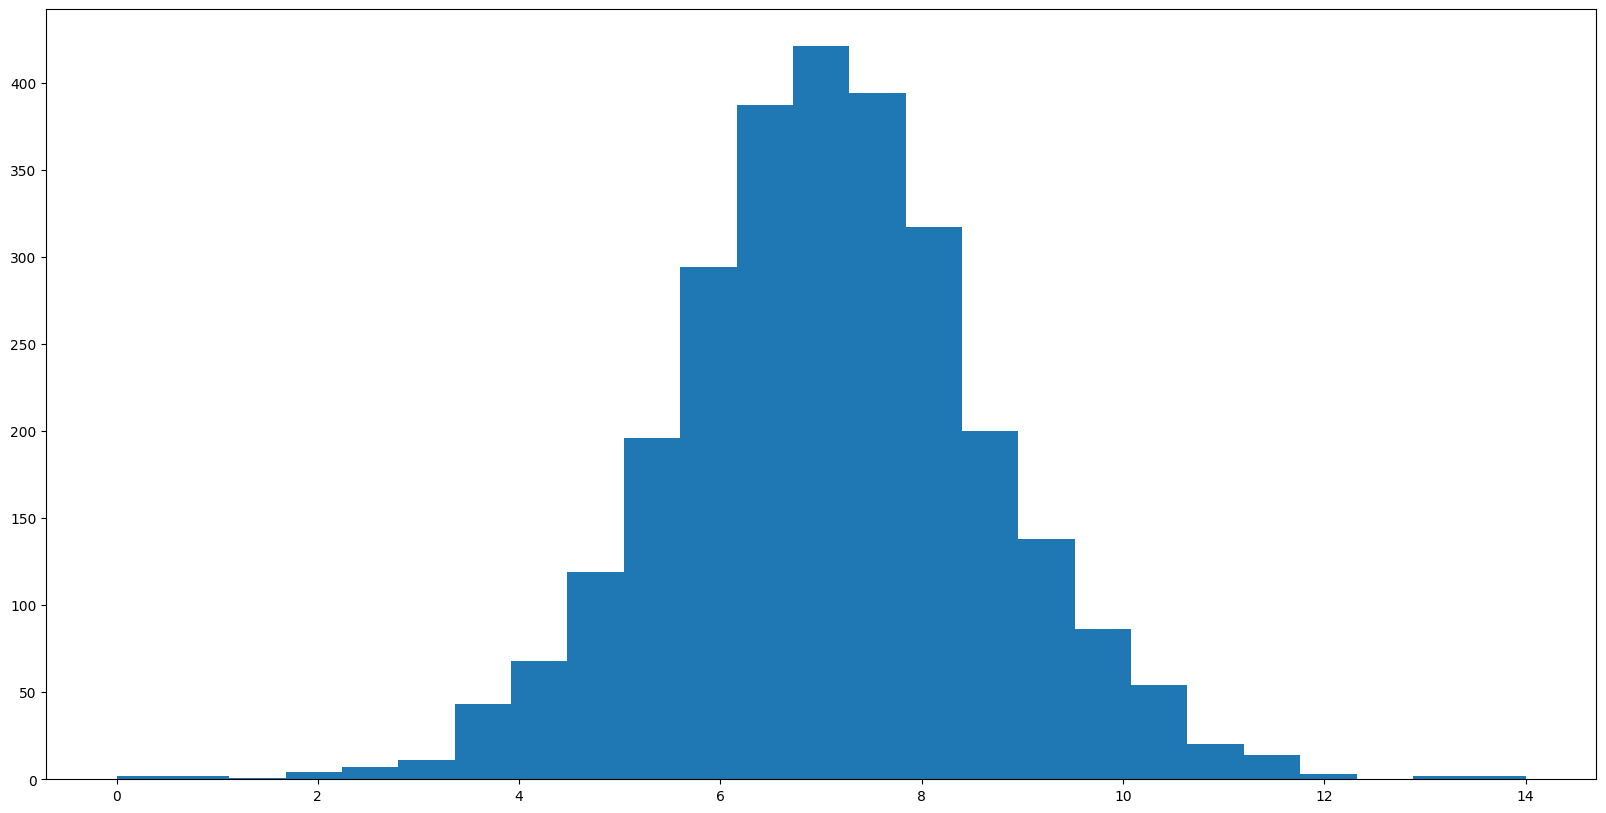

In [51]:
plt.figure(figsize=(20, 10))
plt.hist(df['ph'], bins=25)
# plt.hist(df['Hardness'], bins=25)
plt.show()

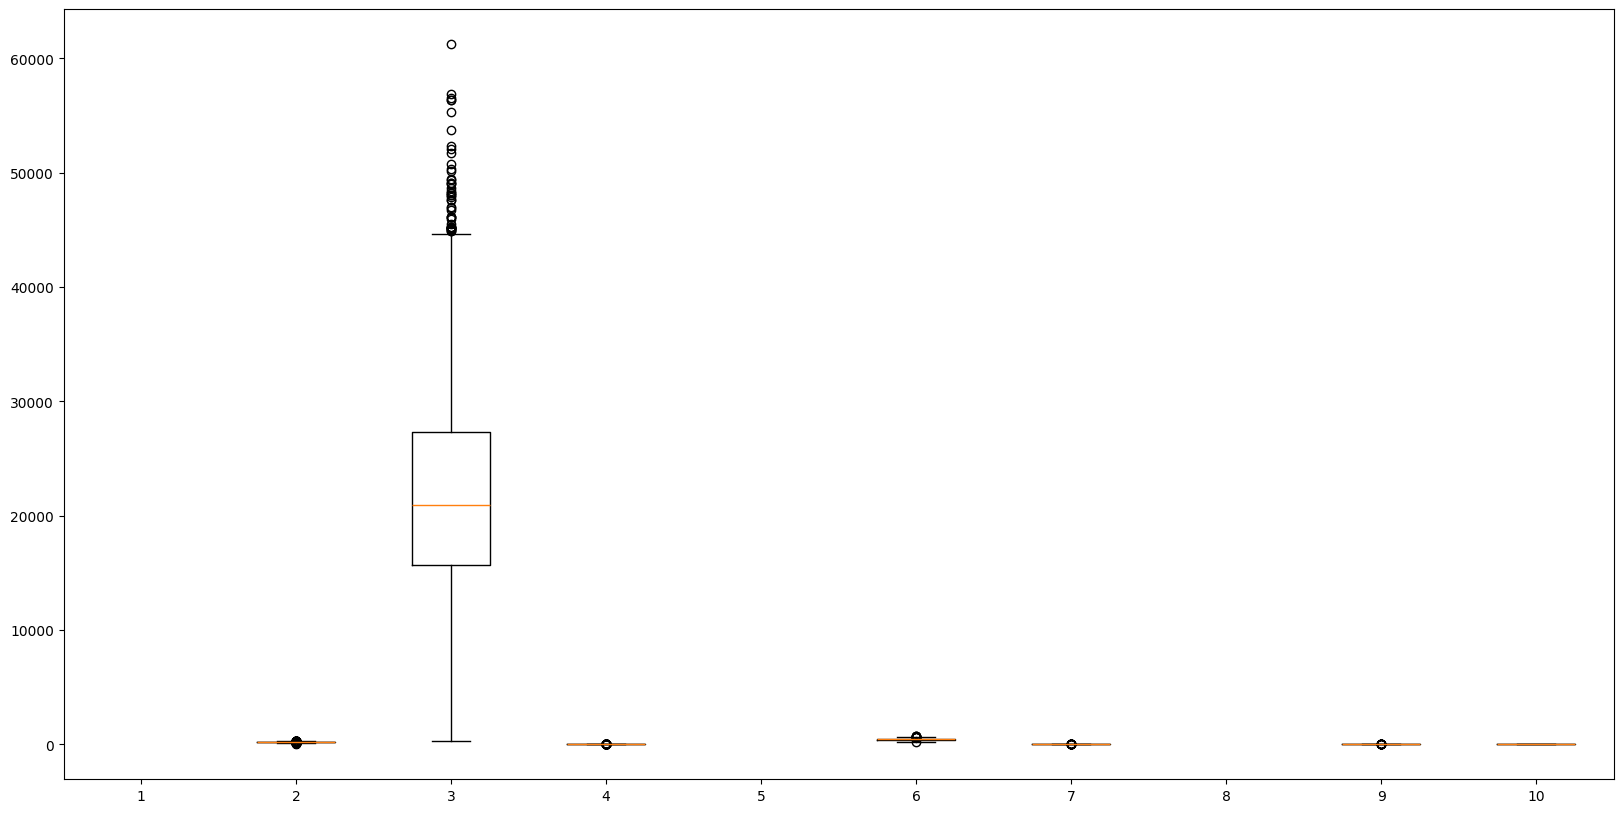

In [93]:
plt.figure(figsize=(20, 10))
plt.boxplot(df)
plt.show()

Check if the dataset is balanced.

In [94]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [95]:
# Write your code here. Add as many boxes as you need.
isnull = df.isnull().sum()
per_missing = isnull / len(df) * 100
per_missing = per_missing.reset_index().rename(columns = {"index": "Feature", 0:"Percentage Missing"})
per_missing

,Feature,Percentage Missing
0,ph,14.987790
1,Hardness,0.000000
2,Solids,0.000000
3,Chloramines,0.000000
4,Sulfate,23.840049
5,Conductivity,0.000000
6,Organic_carbon,0.000000
7,Trihalomethanes,4.945055
8,Turbidity,0.000000
9,Potability,0.000000


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

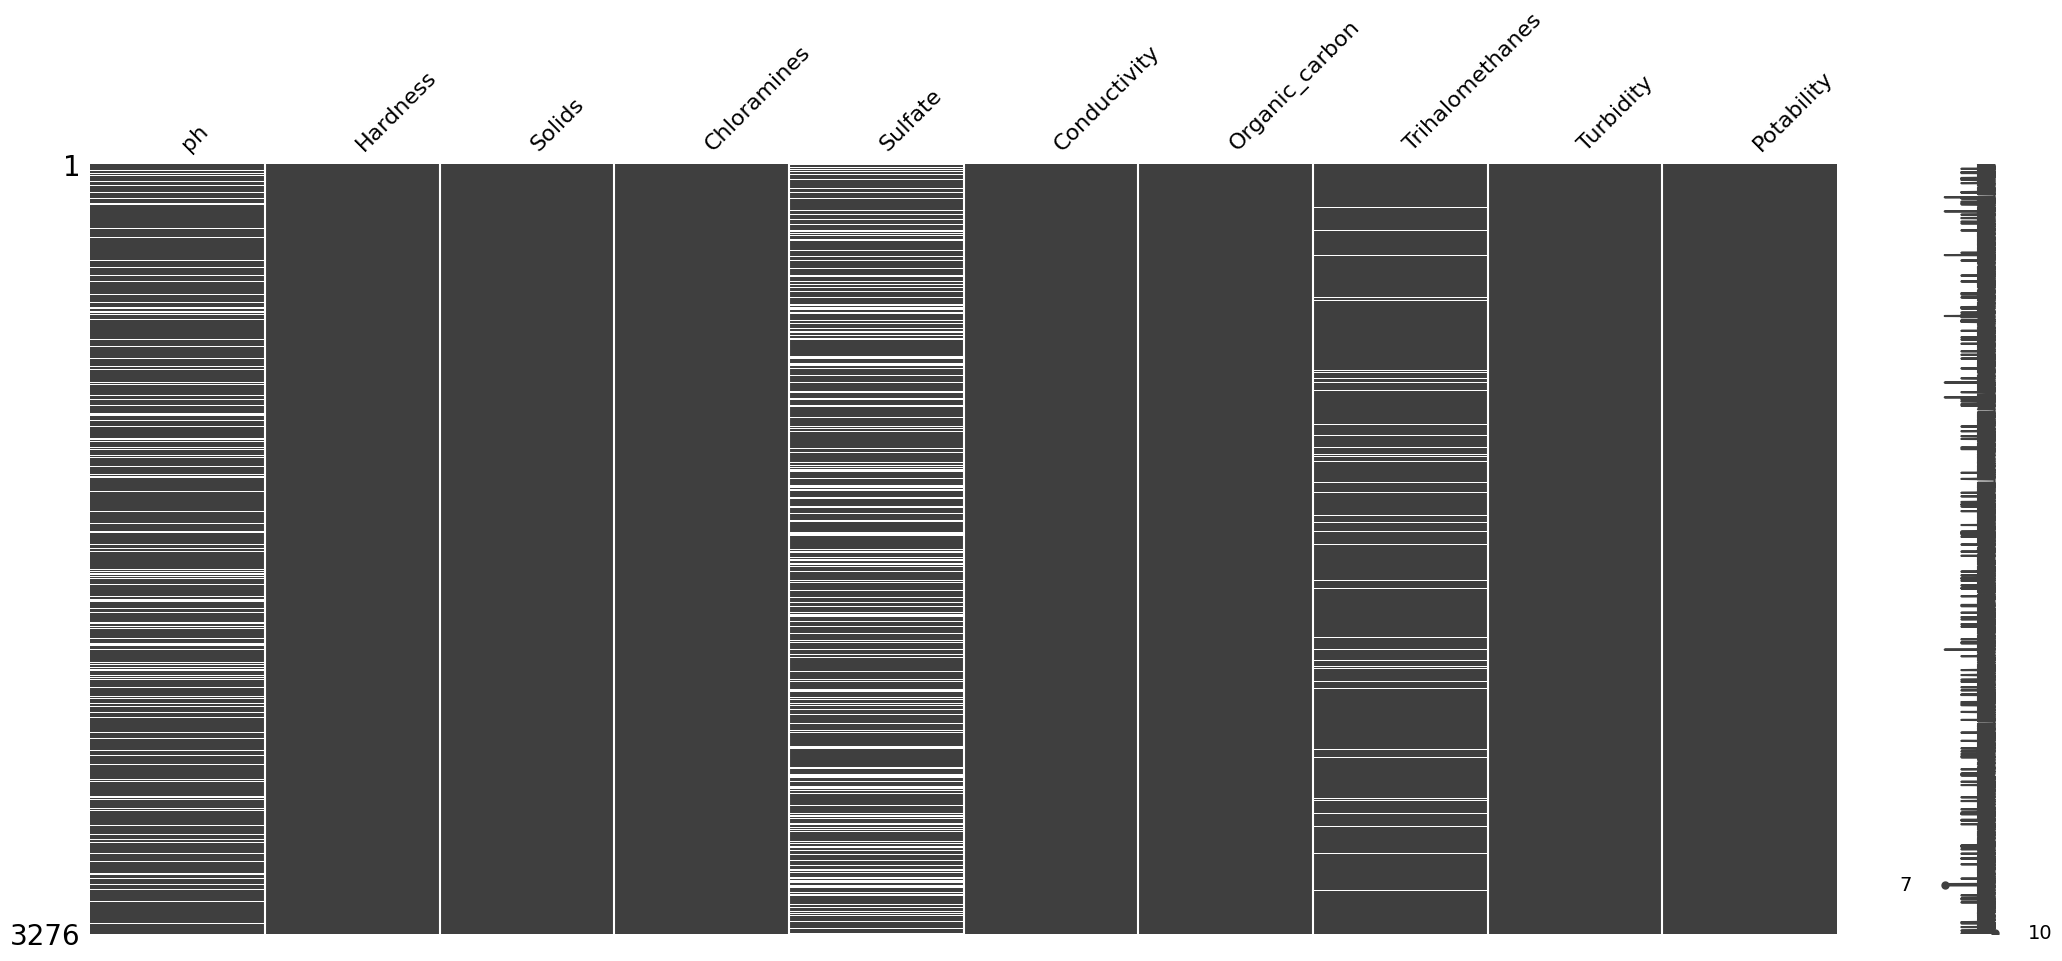

In [96]:
# Write your code here. Add as many boxes as you need.
msno.matrix(df)

<Axes: >

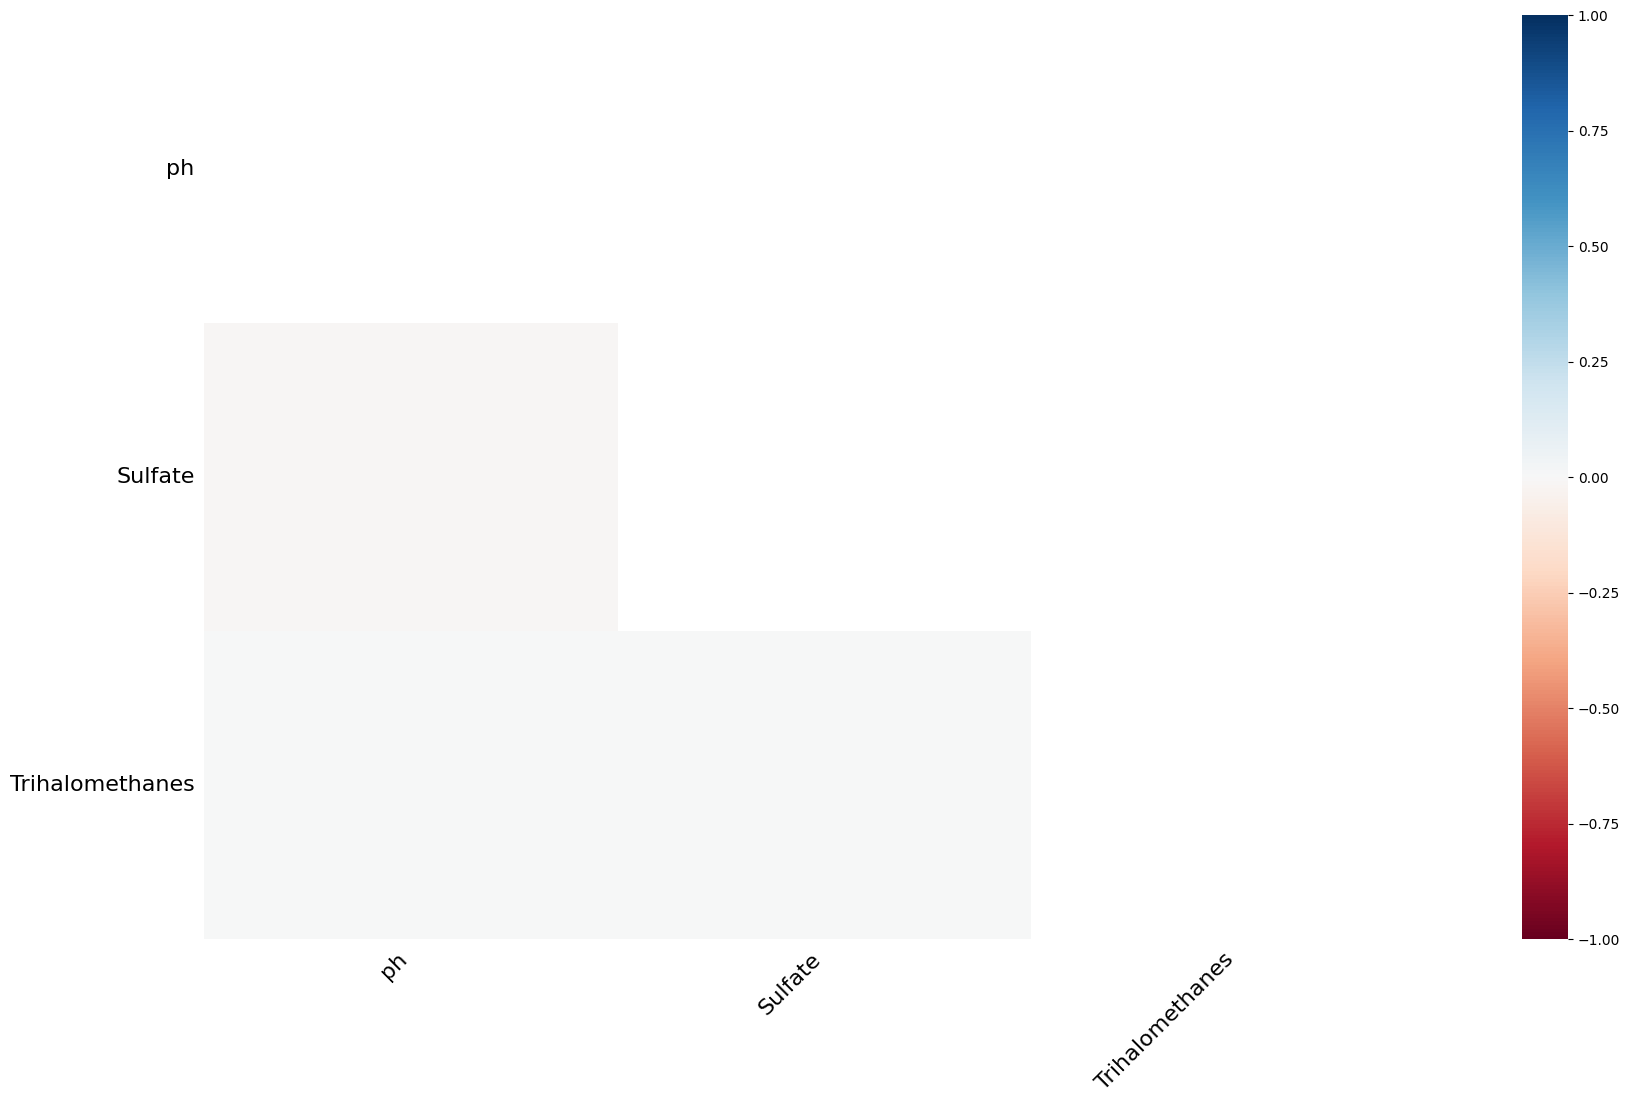

In [97]:
msno.heatmap(df)

In [98]:
missing_df = df[['ph', 'Sulfate', 'Trihalomethanes']]
missing_df.isnull().corr()

,ph,Sulfate,Trihalomethanes
ph,1.000000,-0.010144,0.006783
Sulfate,-0.010144,1.000000,0.004557
Trihalomethanes,0.006783,0.004557,1.000000


<Axes: >

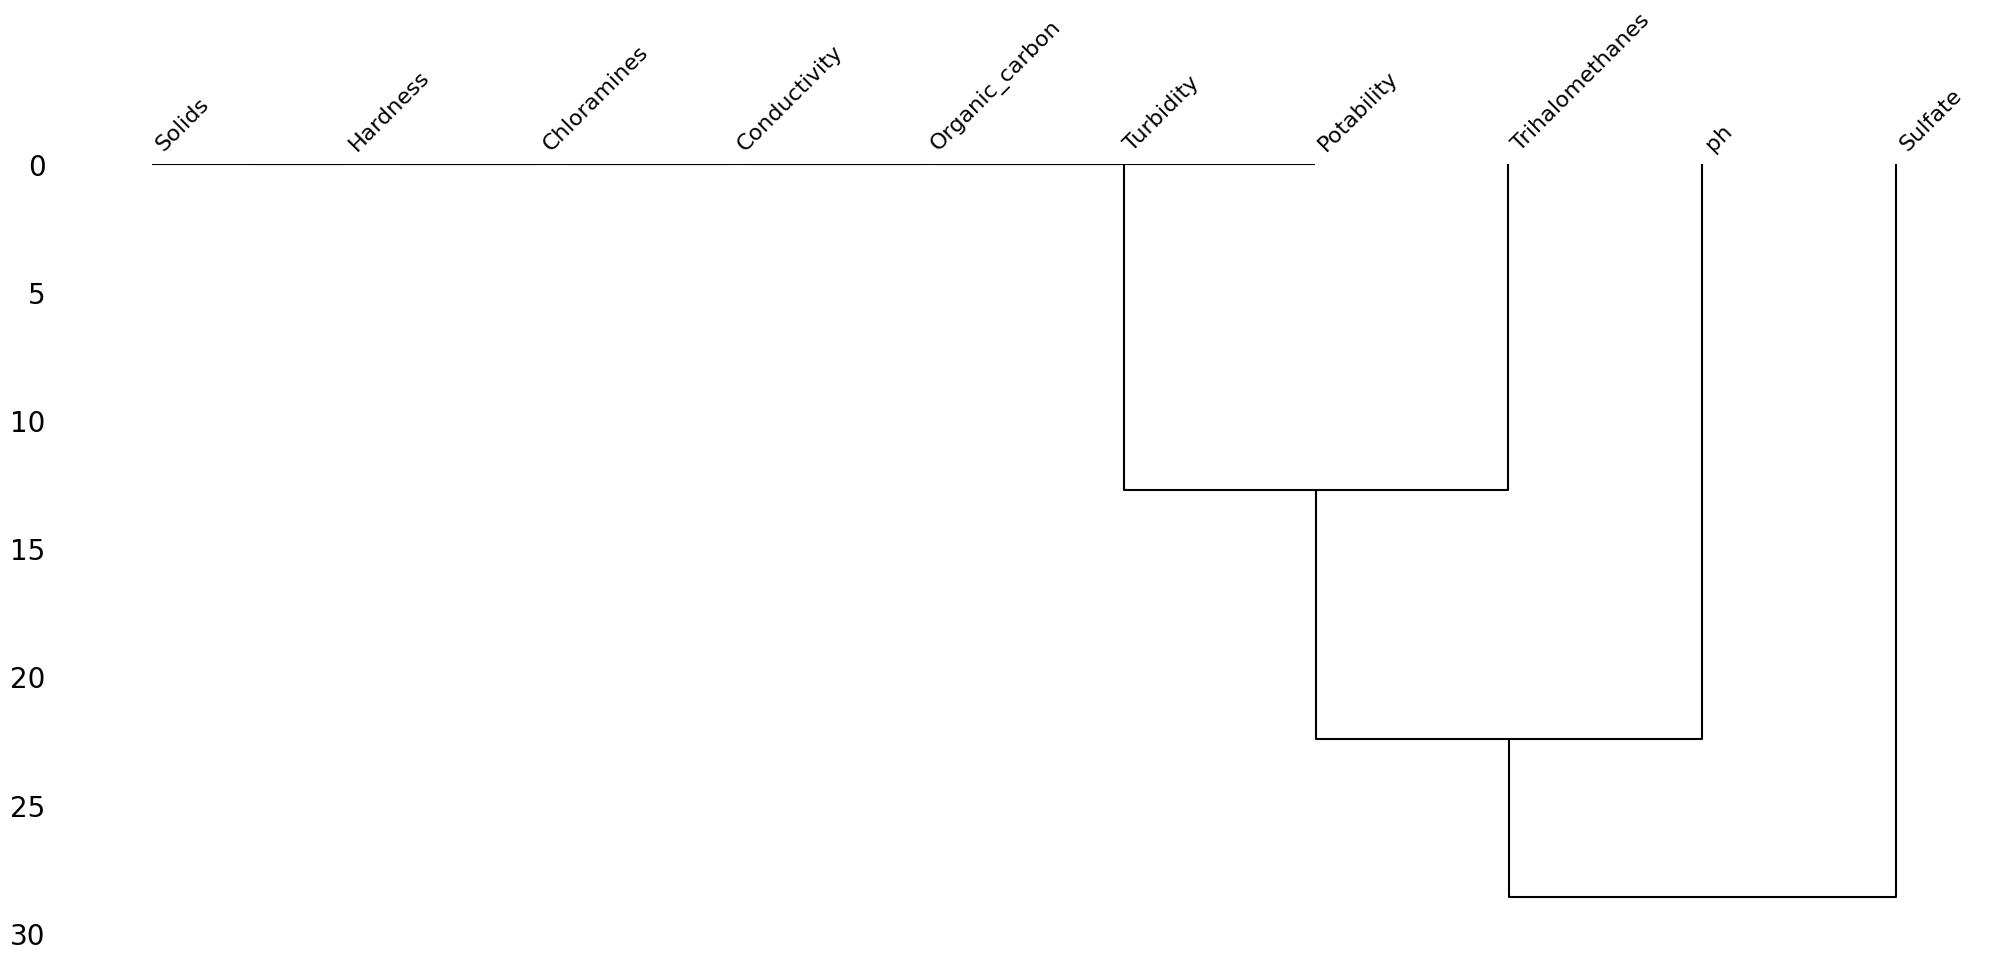

In [99]:
msno.dendrogram(df)

<Axes: >

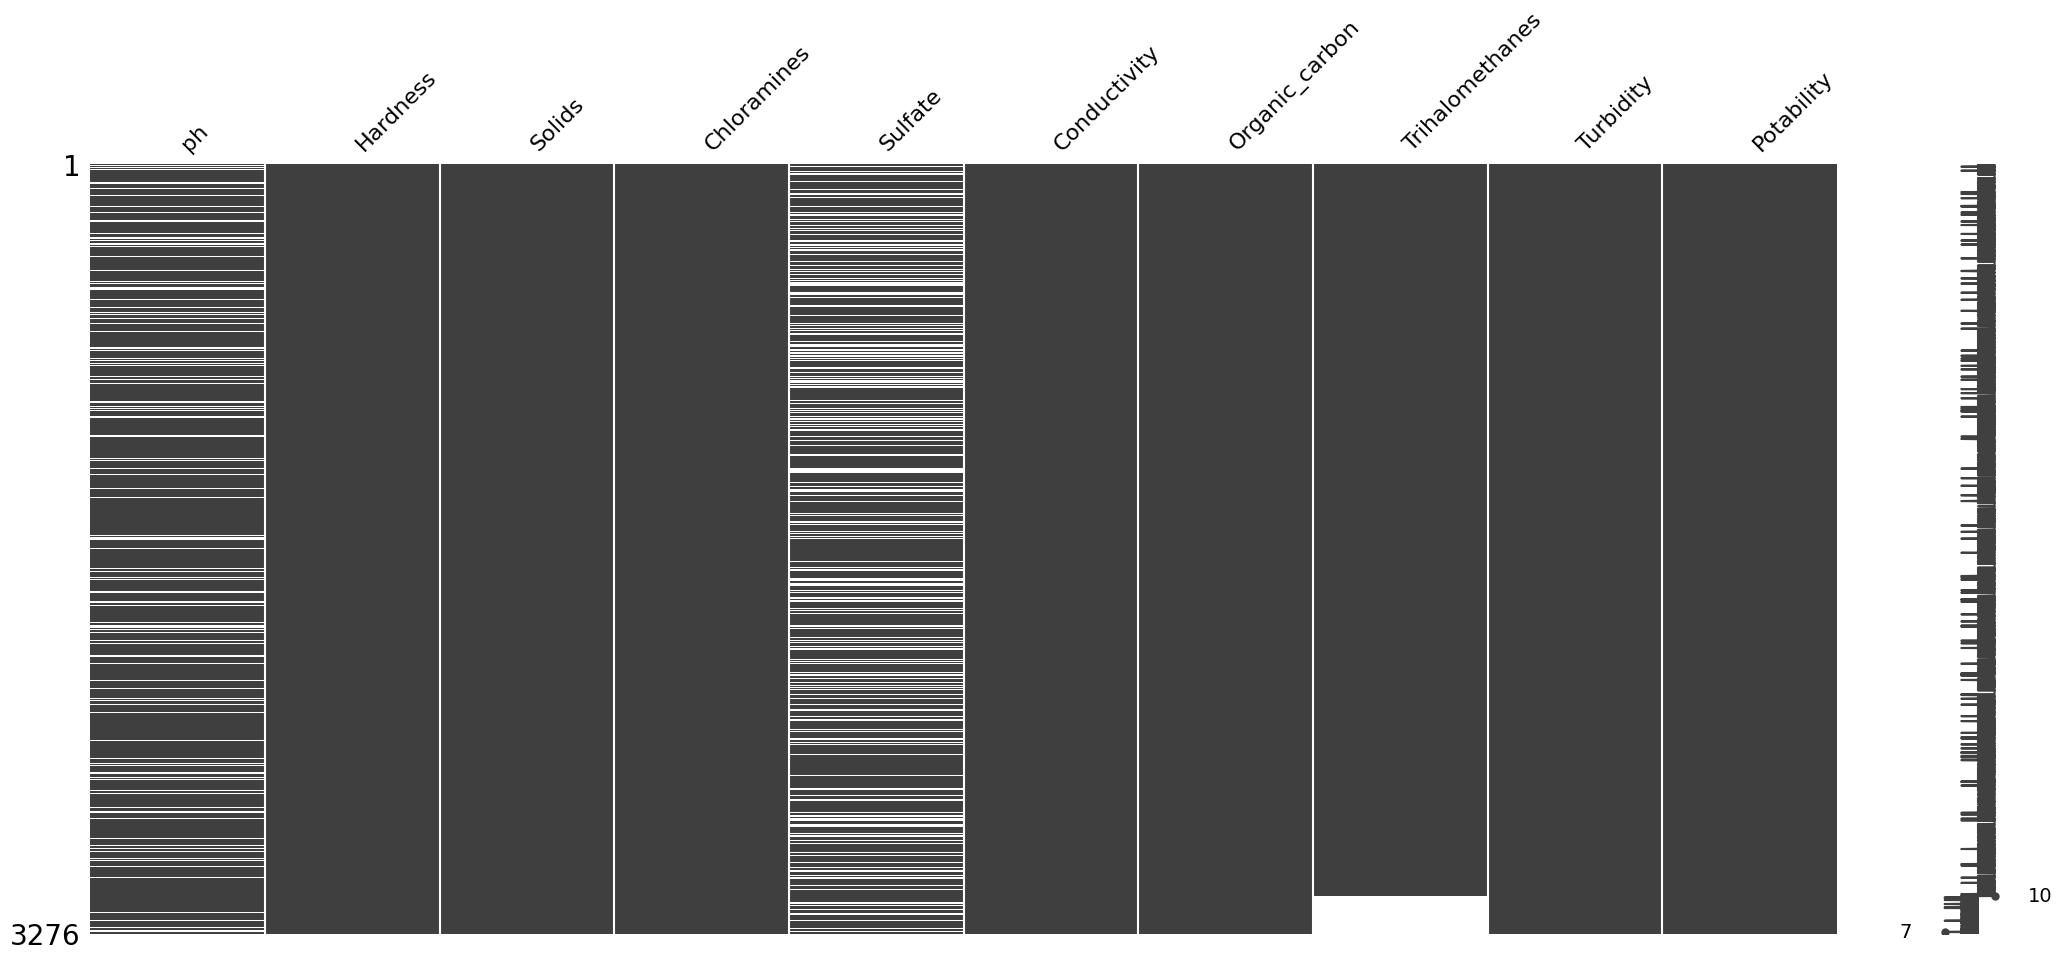

In [100]:
msno.matrix(df.sort_values('Trihalomethanes'))

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [101]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [226]:
df = pd.read_csv('./data/water-potability.csv')

In [227]:
# missing info is MCAR (Missing Completly in Random)
# df = df.drop(columns=['Sulfate']) # probaj so mean ili nes dr
df.dropna(subset=['Sulfate', 'ph', 'Trihalomethanes'], inplace=True, axis=0)

# df['ph'] = df['ph'].fillna(df['ph'].mean())
# df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
# df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [228]:
len(df)

2011

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [229]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split

X = df.drop(columns="Potability", axis=1)
Y = df["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0, shuffle=True)
y_train

1594    1
845     0
3211    1
572     0
2965    0
       ..
1354    0
1979    1
2700    0
908     0
1099    1
Name: Potability, Length: 1608, dtype: int64

## Feature Scaling
Standardize the features using `StandardScaler`.

In [230]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1594,8.733525,203.396130,24578.421221,6.594145,288.678463,336.824656,16.701920,68.793062,3.149202
845,6.592443,242.480473,9381.239931,7.303184,312.814395,440.601135,14.027297,70.929879,3.060827
3211,6.817608,219.337429,27548.614177,6.298121,340.937614,530.710026,19.486791,68.568791,3.048292
572,8.805178,157.231982,4728.650671,8.848262,356.773638,299.279775,9.439925,61.640597,5.176205
2965,9.459931,222.894659,14450.175747,6.790914,293.746321,433.145005,9.069161,67.906813,3.322890


In [231]:
# Write your code here. Add as many boxes as you need.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [232]:
X_train

array([[ 1.05443436,  0.24262595,  0.31794103, ...,  0.73251606,
         0.14055002, -1.03907971],
       [-0.31857621,  1.42852374, -1.44942972, ..., -0.08211726,
         0.27673103, -1.15230833],
       [-0.17418426,  0.72631711,  0.66336247, ...,  1.5807284 ,
         0.12625708, -1.16836901],
       ...,
       [ 0.01817746, -0.27914902,  1.12625928, ...,  1.45499969,
         0.59367636,  0.4781612 ],
       [ 2.04746713,  0.09547425, -1.5974678 , ...,  0.4156848 ,
        -2.41011057,  0.78504474],
       [ 0.11569758, -1.22103078,  1.08351118, ...,  0.94072448,
         0.41599378, -0.21904317]])

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [233]:
# Write your code here. Add as many boxes as you need.
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

Use the trained model to make predictions for the test set.

In [234]:
# Write your code here. Add as many boxes as you need.
predict = KNN.predict(X_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [235]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tochnost
# Kolku tochno sme pogodile za site dali se bolni ili ne
accuracy = accuracy_score(y_test, predict)
accuracy

0.7022332506203474

In [236]:
# Preciznost
# Kolku tochno sme pogodile deka se bolni od site sho sme rekle deka se bolni
precision = precision_score(y_test, predict, average='binary')
precision

np.float64(0.7313432835820896)

In [237]:
# Senzitivnost
# Kolku tochno sme pogodile deka se bolni od site sho navistina se bolni
# sme rekle deka se bolni i se bolni / site bolni (site sho se bolni i sme rekle deka se bolni + tie sho se bolni a sme rekle deka se zdravi)
recallScore = recall_score(y_test, predict, average='binary')
recallScore

np.float64(0.32450331125827814)

In [238]:
# 2 * recallScore + precision / (recallScore + precision) / nekoja sredna vrednost
f1Score = f1_score(y_test, predict, average='binary')
f1Score

np.float64(0.44954128440366975)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [246]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import GridSearchCV

X = df.drop(columns="Potability", axis=1)
Y = df["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=0, shuffle=True)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [247]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [248]:
# Write your code here. Add as many boxes as you need.
KNN = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(5, 25)}

grid_search = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24])},
             scoring='accuracy')

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [252]:
# Write your code here. Add as many boxes as you need.
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_n_neighbors

np.int64(16)

In [251]:
best_knn_model = grid_search.best_estimator_

y_pred = best_knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [253]:
test_accuracy

0.7079207920792079